## Importing Packages and Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')       #to get access to my files through Google Drive

Mounted at /content/drive


In [3]:
!date

import aesara.tensor as at
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter      #importing packages

%matplotlib inline            

Mon Dec 19 02:00:57 UTC 2022


In [4]:
az.style.use("arviz-darkgrid")
plt.rcParams["figure.constrained_layout.use"] = True          #settings

In [5]:
df_all = pd.read_csv(f'/content/drive/My Drive/MIT Year 4/Fall Semester/9.66/9.66 Final Project/nfl_games_data.csv', index_col=0)
df_all.tail()       #loading and looking at data fron all seasons

,season,week,home_team,home_score,away_team,away_score,home_completions,home_attempts,home_passing_air_yards,home_passing_yards_after_catch,...,away_carries,away_rushing_yards,away_rushing_tds,away_rushing_first_downs,away_rushing_epa,away_receiving_yards,away_receiving_tds,away_receiving_yards_after_catch,away_receiving_epa,away_special_teams_tds
2021_18_NYJ_BUF,2021,18,BUF,27,NYJ,10,25,46,419.0,121.0,...,17,48.0,0,1.0,-5.64,87.0,1,33.0,-0.87,0.0
2021_18_SF_LA,2021,18,LA,24,SF,27,21,32,278.0,68.0,...,31,135.0,1,8.0,1.47,340.0,2,172.0,11.01,0.0
2021_18_NE_MIA,2021,18,MIA,33,NE,24,15,22,124.0,67.0,...,27,134.0,2,11.0,1.71,261.0,1,105.0,-2.36,0.0
2021_18_CAR_TB,2021,18,TB,41,CAR,17,29,39,310.0,147.0,...,26,110.0,0,6.0,-6.96,219.0,2,151.0,-3.19,0.0
2021_18_LAC_LV,2021,18,LV,35,LAC,32,21,37,276.0,106.0,...,21,85.0,1,5.0,-5.04,383.0,3,125.0,20.66,0.0


In [6]:
len(df_all['home_team'].unique())    #checking team names (should be length 32)

32

In [8]:
df_all = df_all[['season', 'home_team', 'home_score', 'away_team', 'away_score', 'home_passing_epa', 'home_rushing_epa', 'away_passing_epa', 'away_rushing_epa']]
df_all = df_all.query("season == " + str(2021))
df_all['total_home_epa'] = df_all['home_passing_epa'] + df_all['home_rushing_epa']    #getting only the relevant columns and most recent year of data
df_all['total_away_epa'] = df_all['away_passing_epa'] + df_all['away_rushing_epa']
df_all                            #also added total team EPA columns

,season,home_team,home_score,away_team,away_score,home_passing_epa,home_rushing_epa,away_passing_epa,away_rushing_epa,total_home_epa,total_away_epa
2021_01_DAL_TB,2021,TB,31,DAL,29,14.01,-4.60,14.21,-4.73,9.41,9.48
2021_01_PHI_ATL,2021,ATL,6,PHI,32,-15.98,-1.91,11.98,1.21,-17.89,13.19
2021_01_PIT_BUF,2021,BUF,16,PIT,23,-6.09,-1.68,-0.83,-3.84,-7.77,-4.67
2021_01_NYJ_CAR,2021,CAR,19,NYJ,14,2.87,-6.01,-6.75,-4.84,-3.14,-11.59
2021_01_MIN_CIN,2021,CIN,27,MIN,24,4.17,-5.98,11.60,-7.62,-1.81,3.98
...,...,...,...,...,...,...,...,...,...,...,...
2021_18_NYJ_BUF,2021,BUF,27,NYJ,10,-0.32,-0.05,-18.22,-5.64,-0.37,-23.86
2021_18_SF_LA,2021,LA,24,SF,27,12.57,-9.96,6.17,1.47,2.61,7.64
2021_18_NE_MIA,2021,MIA,33,NE,24,-2.75,3.61,1.48,1.71,0.86,3.19
2021_18_CAR_TB,2021,TB,41,CAR,17,15.67,-0.91,-6.78,-6.96,14.76,-13.74


## Analysis of Data

In [10]:
df_all["difference"] = np.abs(df_all["home_score"] - df_all["away_score"])      #creating a column to see how much the winner usually wins by 

In [11]:
df_all["difference_non_abs"] = df_all["home_score"] - df_all["away_score"]      #creating a column to see how much the home team usually wins by

In [12]:
df_all.describe()       #data summary

,season,home_score,away_score,home_passing_epa,home_rushing_epa,away_passing_epa,away_rushing_epa,total_home_epa,total_away_epa,difference,difference_non_abs
count,272.0,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2021.0,23.838235,22.125000,1.263934,-0.934449,1.264743,-0.793125,0.329485,0.471618,12.176471,1.713235
std,0.0,10.590479,10.057721,11.166516,4.979919,11.578404,4.652874,12.118649,12.465194,9.606949,15.432466
min,2021.0,0.000000,0.000000,-29.730000,-15.000000,-35.560000,-18.080000,-34.590000,-37.400000,0.000000,-38.000000
25%,2021.0,16.000000,14.750000,-5.787500,-3.980000,-7.407500,-3.882500,-7.060000,-8.270000,4.000000,-8.000000
50%,2021.0,23.000000,22.500000,1.610000,-1.240000,2.480000,-0.955000,0.625000,1.275000,10.000000,1.500000
75%,2021.0,31.000000,30.000000,8.482500,2.410000,9.942500,1.725000,7.947500,9.810000,18.000000,10.000000
max,2021.0,56.000000,51.000000,32.460000,13.630000,28.920000,12.770000,33.800000,37.430000,42.000000,42.000000


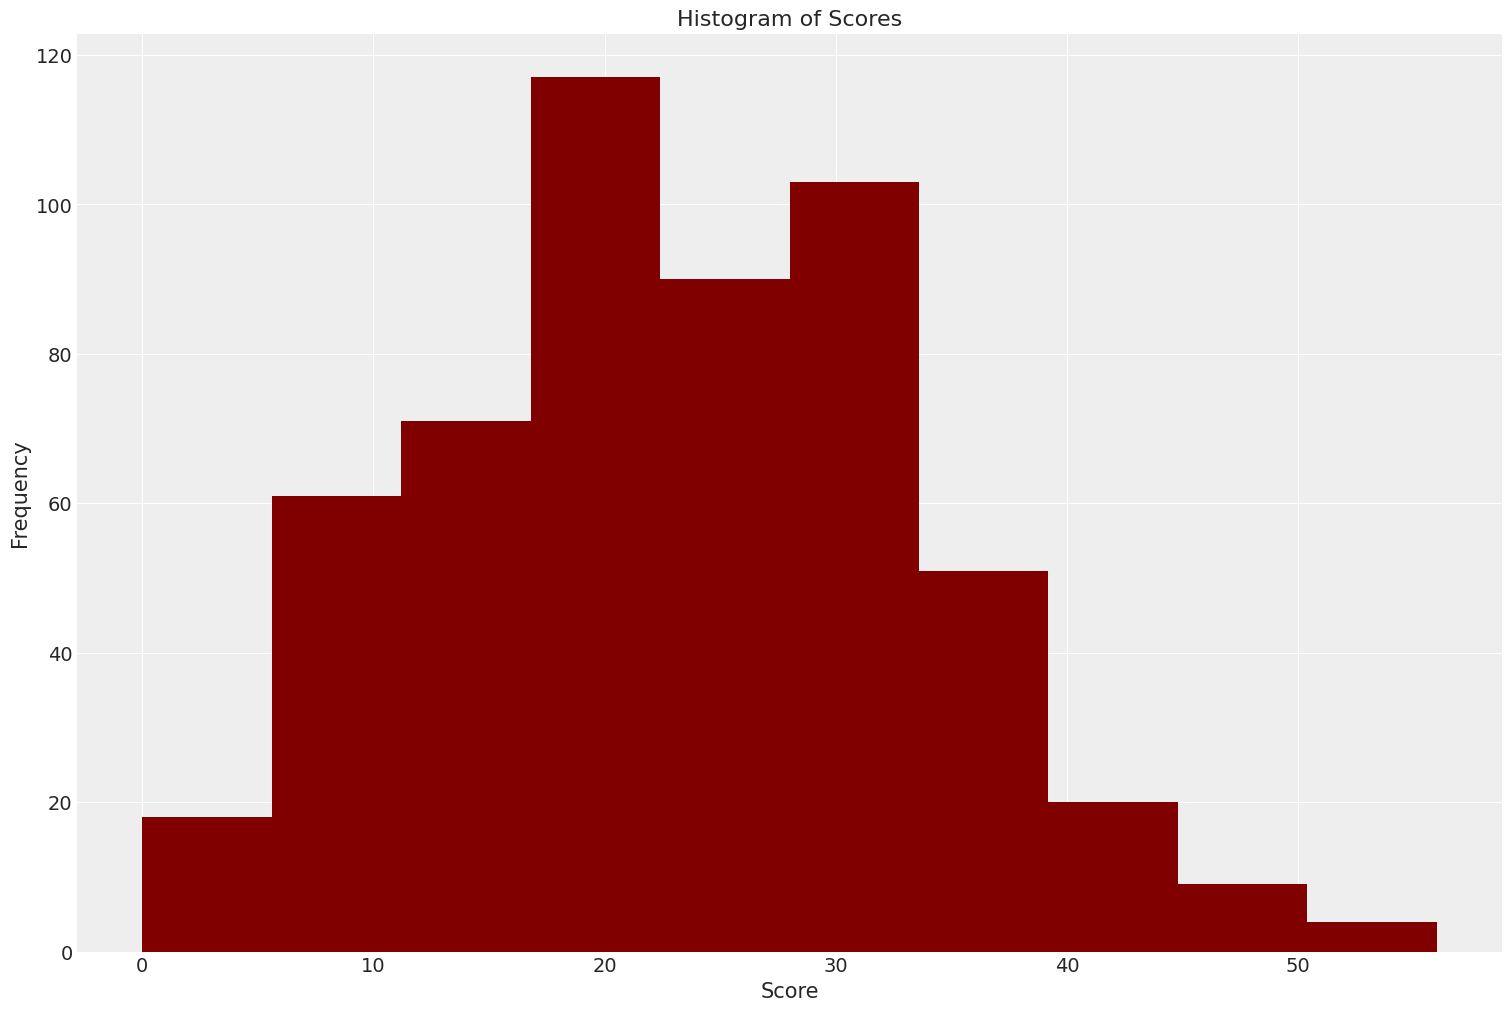

Score mean :  22.981617647058822
Score standard deviation :  10.344064099235867


In [14]:
fig = plt.figure(figsize = (15, 10))

scores = list(df_all['away_score']) + list(df_all['home_score'])
 
# creating a bar plot/histogram
plt.hist(scores, color ='maroon',)
 
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")
plt.show()

print('Score mean : ', str(np.mean(scores)))
print('Score standard deviation : ', np.std(scores))      #printing the histogram of score values from all teams in the data, along with its mean and standard deviation      

mean difference :  1.713235294117647
std of difference :  238.16100499240284


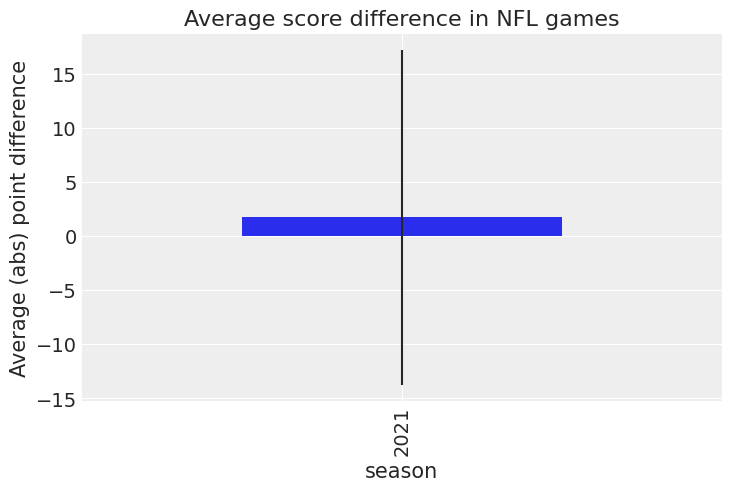

In [13]:
(
    df_all.groupby("season")["difference_non_abs"]
    .mean()
    .plot(
        kind="bar",
        title="Average score difference in NFL games",
        yerr=df_all.groupby("season")["difference_non_abs"].std(),
    )
    .set_ylabel("Average (abs) point difference")
);    

#the mean and variance don't necessarily make sense as a difference of Poisson variables, could be future work

print('mean difference : ', df_all['difference_non_abs'].mean())
print('std of difference : ', df_all['difference_non_abs'].var())

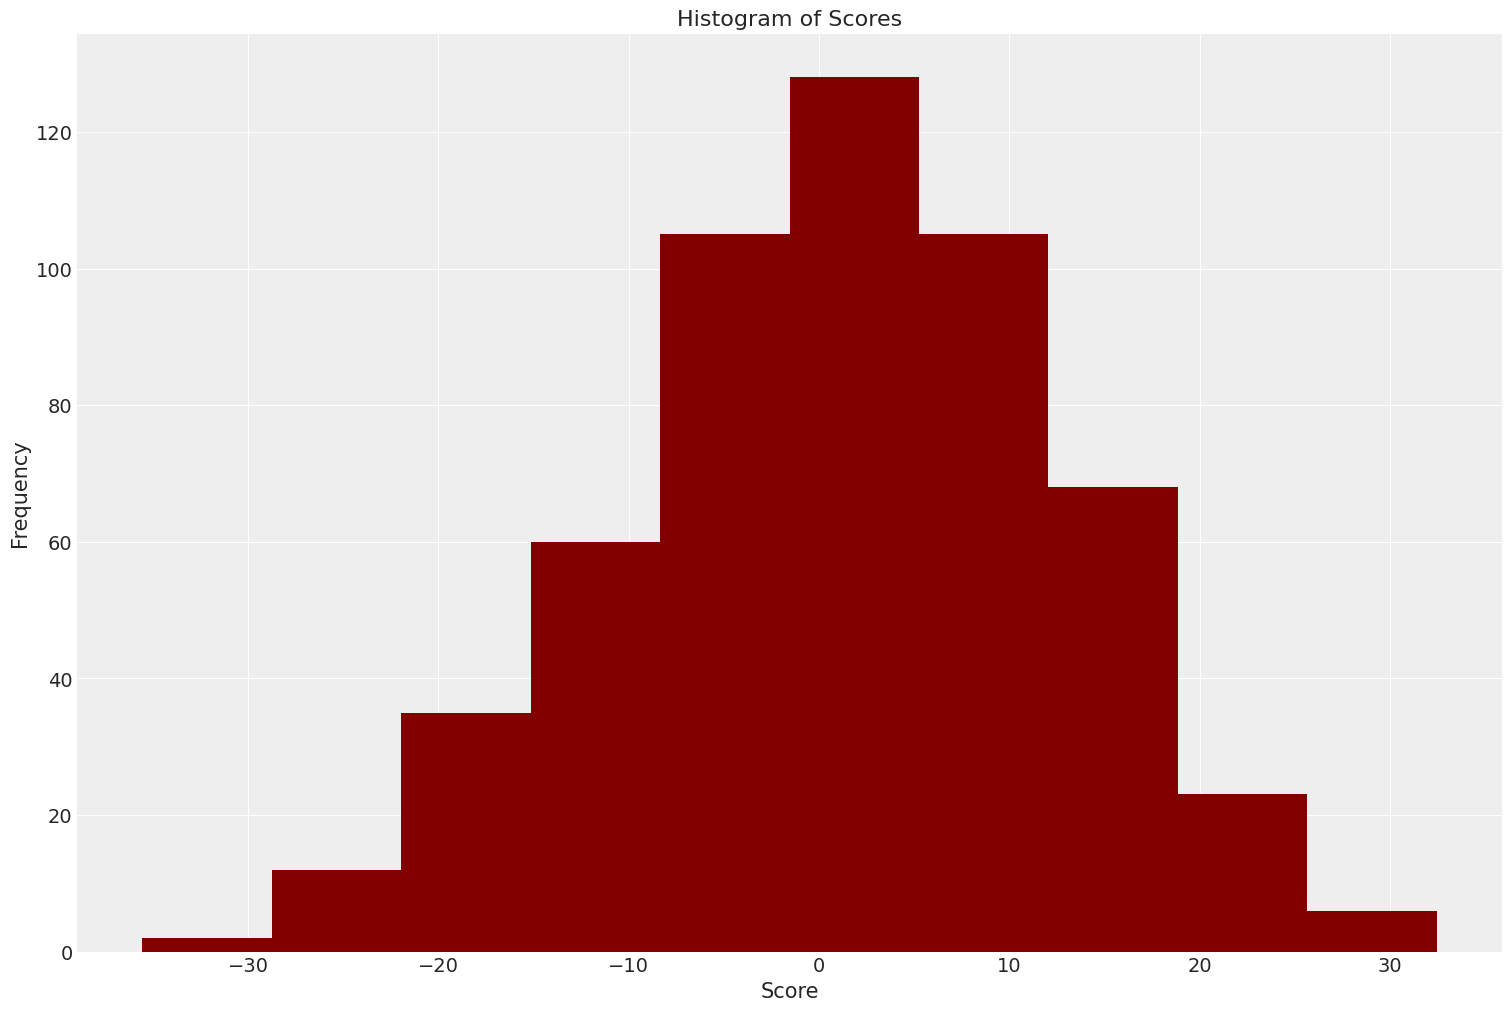

mean EPA :  1.2643382352941175
std of EPA :  11.353396660847274


In [16]:
fig = plt.figure(figsize = (15, 10))

passing_epa = list(df_all['away_passing_epa']) + list(df_all['home_passing_epa'])
 
# creating the histogram
plt.hist(passing_epa, color ='maroon',)
 
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")
plt.show()                  #showing the histogram of total team EPA in each game

print('mean EPA : ', np.mean(passing_epa))
print('std of EPA : ', np.std(passing_epa))

In [17]:
df_all.pivot_table("difference_non_abs", "home_team", "season")       #showing un-adjusted (for team strength) home field advantage numbers

season,2021
home_team,
ARI,-1.750000
ATL,-9.125000
BAL,1.666667
BUF,9.777778
CAR,-5.375000
CHI,-0.500000
CIN,1.111111
CLE,1.444444
DAL,14.250000


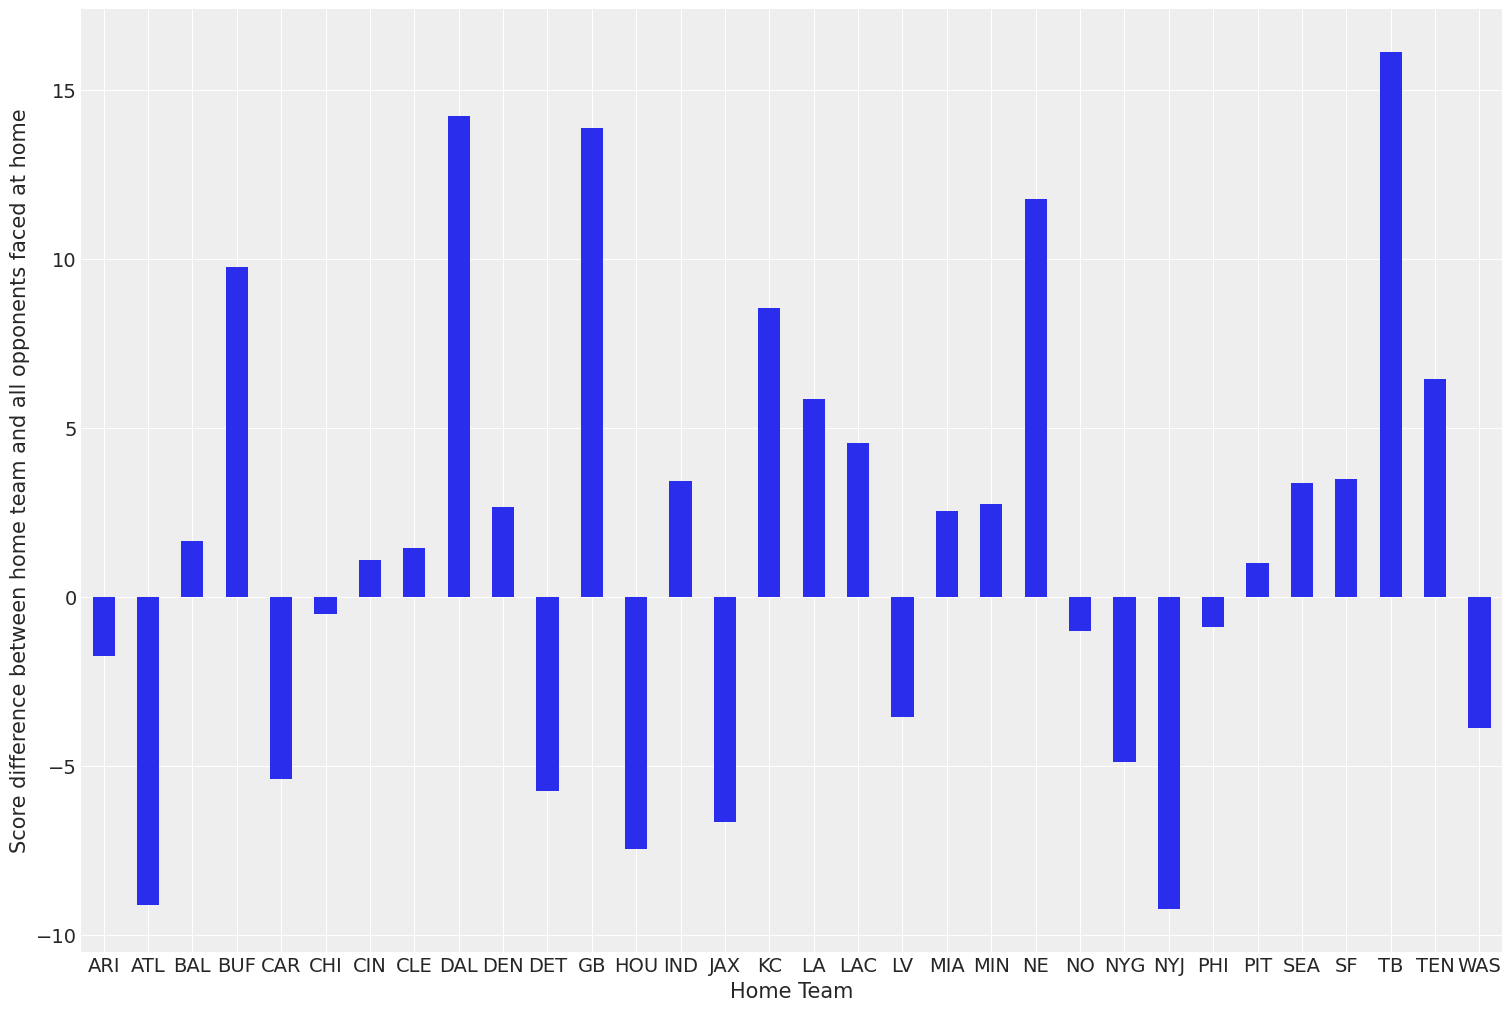

In [18]:
(
    df_all.pivot_table("difference_non_abs", "home_team")
    .rename_axis("Home Team")
    .plot(kind="bar", rot=0, legend=False, figsize=(15, 10))
    .set_ylabel("Score difference between home team and all opponents faced at home")
);                                                                  #visualizing the table above

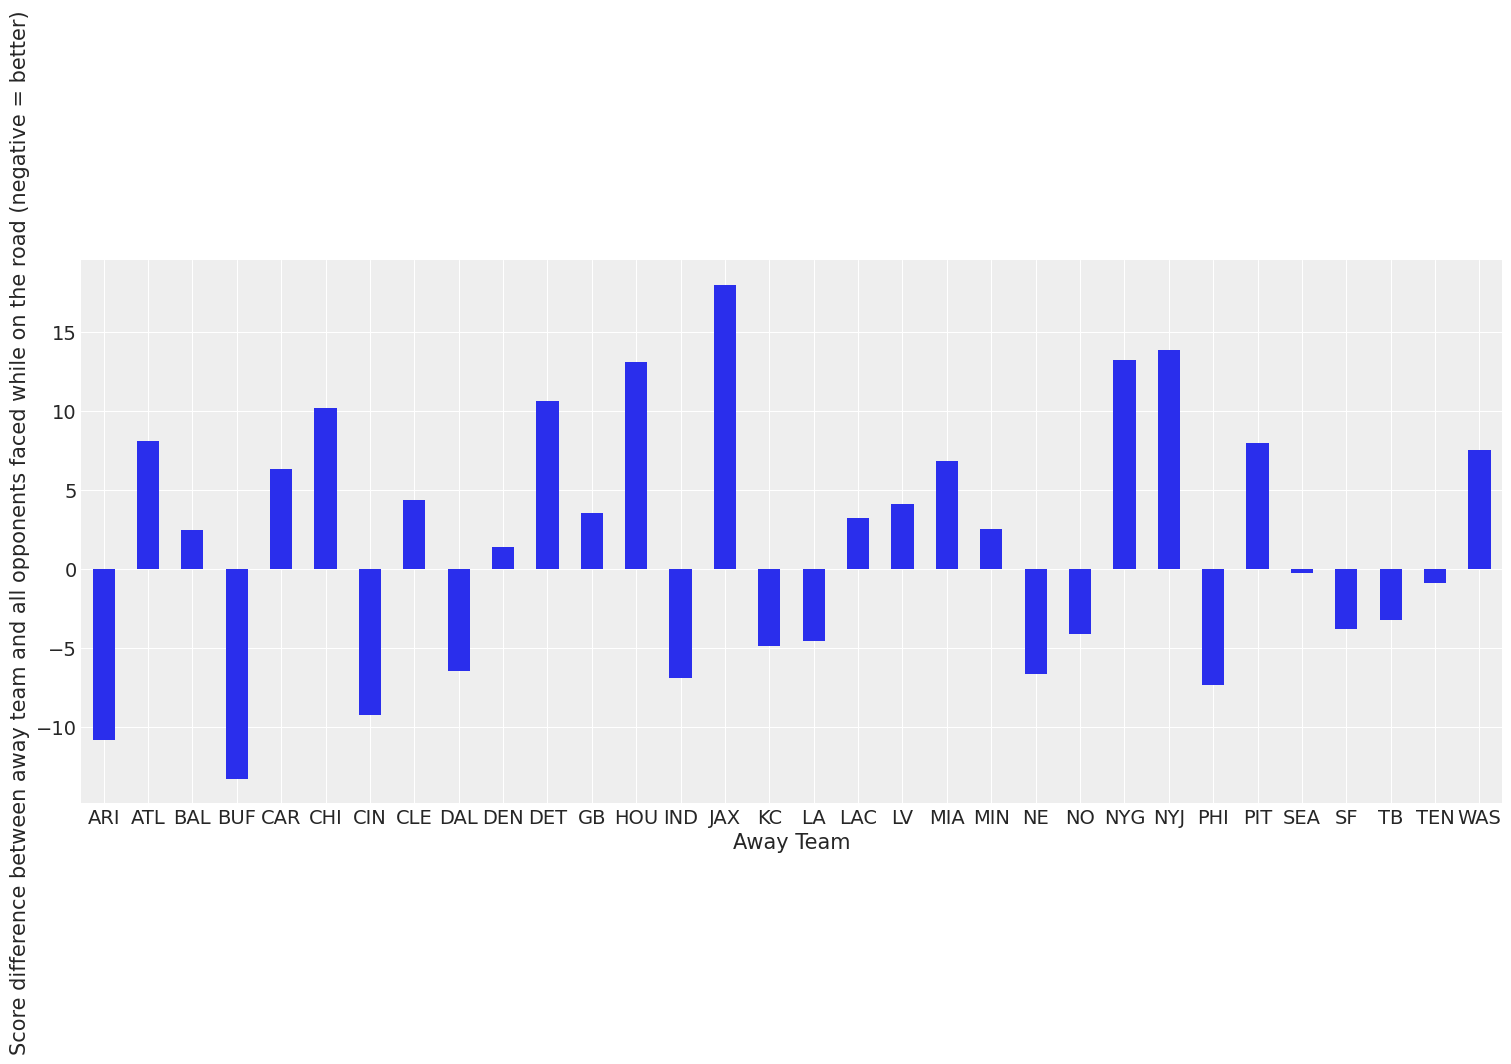

In [19]:
(
    df_all.pivot_table("difference_non_abs", "away_team")
    .rename_axis("Away Team")
    .plot(kind="bar", rot=0, legend=False, figsize=(15, 10))
    .set_ylabel("Score difference between away team and all opponents faced while on the road (negative = better)")
);
#visualizing the opposite of home field advantge, the effect of playing away. again, these are un-adjusted numbers, the real home field advantage is not as severe as this, and it will be 
#shown later in the code
#between this plot and the previous one, you can see that NFL teams do indeed have a home field advantage, which is a bit more than one would expect

In [20]:
result = {'team' : [], 'home field advantage' : []}
for team in df_all['home_team'].unique(): 
  home_df = df_all.query("home_team == '" + str(team) + "'")
  away_df = df_all.query("away_team == '" + str(team) + "'")
  result['team'].append(team)
  home_mean = home_df['difference_non_abs'].mean() #positive is good
  away_mean = away_df['difference_non_abs'].mean() #negative is good
  result['home field advantage'].append(home_mean + away_mean)
result                

        #seeing the un-adjusted scoring difference for teams, both home and away 

{'team': ['TB',
  'ATL',
  'BUF',
  'CAR',
  'CIN',
  'DET',
  'HOU',
  'IND',
  'TEN',
  'WAS',
  'KC',
  'NE',
  'NO',
  'NYG',
  'LA',
  'LV',
  'CHI',
  'CLE',
  'JAX',
  'MIA',
  'NYJ',
  'PHI',
  'PIT',
  'ARI',
  'LAC',
  'SEA',
  'BAL',
  'GB',
  'DEN',
  'MIN',
  'SF',
  'DAL'],
 'home field advantage': [12.902777777777779,
  -1.0138888888888893,
  -3.4722222222222214,
  0.958333333333333,
  -8.13888888888889,
  4.916666666666666,
  5.680555555555555,
  -3.4305555555555554,
  5.569444444444445,
  3.6805555555555554,
  3.6805555555555554,
  5.152777777777779,
  -5.111111111111111,
  8.347222222222221,
  1.3194444444444446,
  0.5694444444444446,
  9.722222222222221,
  5.819444444444445,
  11.333333333333332,
  9.430555555555555,
  4.652777777777779,
  -8.208333333333332,
  9.0,
  -12.527777777777779,
  7.805555555555555,
  3.1527777777777777,
  4.166666666666667,
  17.430555555555557,
  4.041666666666666,
  5.305555555555555,
  -0.2777777777777777,
  7.805555555555555]}

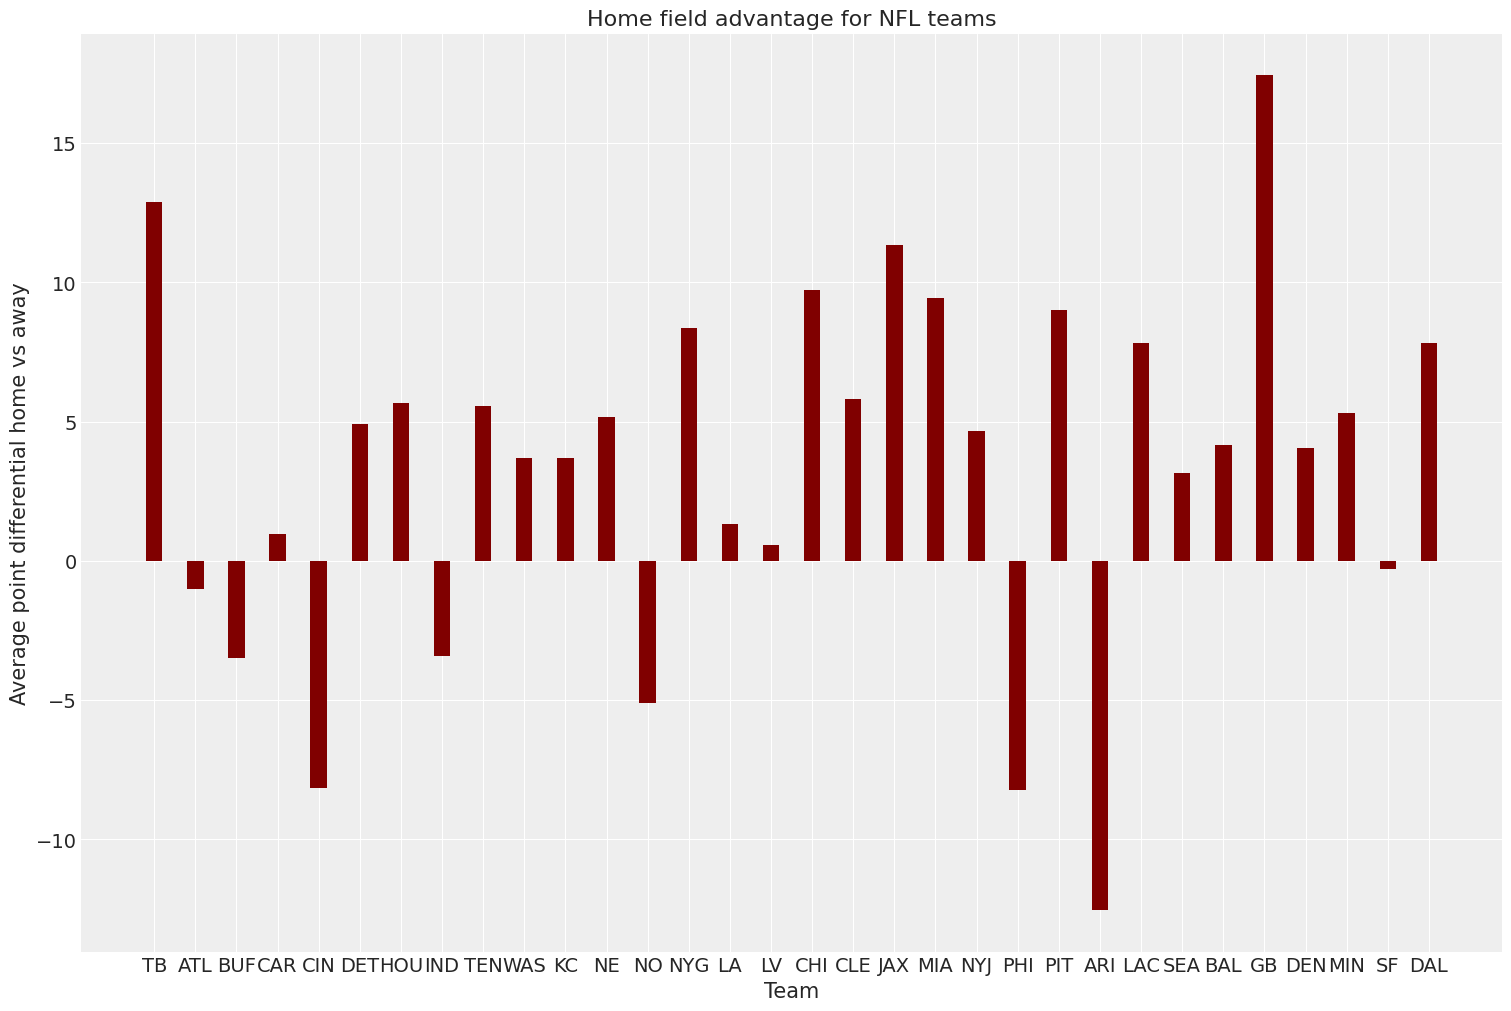

In [21]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(result['team'], result['home field advantage'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Team")
plt.ylabel("Average point differential home vs away")
plt.title("Home field advantage for NFL teams")
plt.show()

#this is a graph representing un-adjusted home field advantage

## Building the Model

In [22]:
plt.rcParams["figure.constrained_layout.use"] = True
home_idx, teams = pd.factorize(df_all["home_team"], sort=True)  
away_idx, _ = pd.factorize(df_all["away_team"], sort=True)    #putting an ID number on each team, the IDs are listed in alphabetical order
coords = {"team": teams}                                      #coords is in that same order
print(teams)

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'LV', 'MIA', 'MIN',
       'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
       'WAS'],
      dtype='object')


In [23]:
with pm.Model(coords=coords) as model:
    # MutableData type allows me to enter additional prediction/testing data
    home_team = pm.MutableData("home_team", home_idx, dims="match")
    away_team = pm.MutableData("away_team", away_idx, dims="match")    #assigning IDs

    # global model parameters
    home = pm.Normal("home", mu=0, sigma=1)
    sd_off = pm.HalfNormal("sd_off", sigma=2)
    sd_def = pm.HalfNormal("sd_def", sigma=2)
    intercept = pm.Normal("intercept", mu=3, sigma=1)

    # team-specific model parameters
    off_star = pm.Normal("off_star", mu=0, sigma=sd_off, dims="team")
    def_star = pm.Normal("def_star", mu=0, sigma=sd_def, dims="team")   #distributions of offensive and defensive team strengths

    offenses = pm.Deterministic("offenses", off_star - at.mean(off_star), dims="team")    
    defenses = pm.Deterministic("defenses", def_star - at.mean(def_star), dims="team")      #offensive and defensive strengths
    home_theta = at.exp(intercept + home + offenses[home_team] + defenses[away_team])
    away_theta = at.exp(intercept + offenses[away_team] + defenses[home_team])            #loglinear combination of offense + defense + intercept ( + home)


    # likelihood of observed data
    home_points = pm.Poisson(
        "home_points",
        mu=home_theta,
        observed=df_all["home_score"],
        dims=("match"),
    )
    away_points = pm.Poisson(
        "away_points",
        mu=away_theta,
        observed=df_all["away_score"],
        dims=("match"),                     #was only able to find points data for this season, no EPA data like in the other model
    )                          

    # likelihood of EPA data
    home_epa = pm.Normal(
        "home_epa",
        mu=offenses[home_team] + defenses[away_team],
        sigma=121 + 121,
        observed=df_all["total_home_epa"],
        dims=("match"),
    )
    away_epa = pm.Normal(
        "away_epa",
        mu=offenses[away_team] + defenses[home_team],
        sigma=121 + 121,
        observed=df_all['total_away_epa'], 
        dims=('match'),
    )

    trace = pm.sample(1000, tune=1500, cores=4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd53b31880>,
      dtype=object)

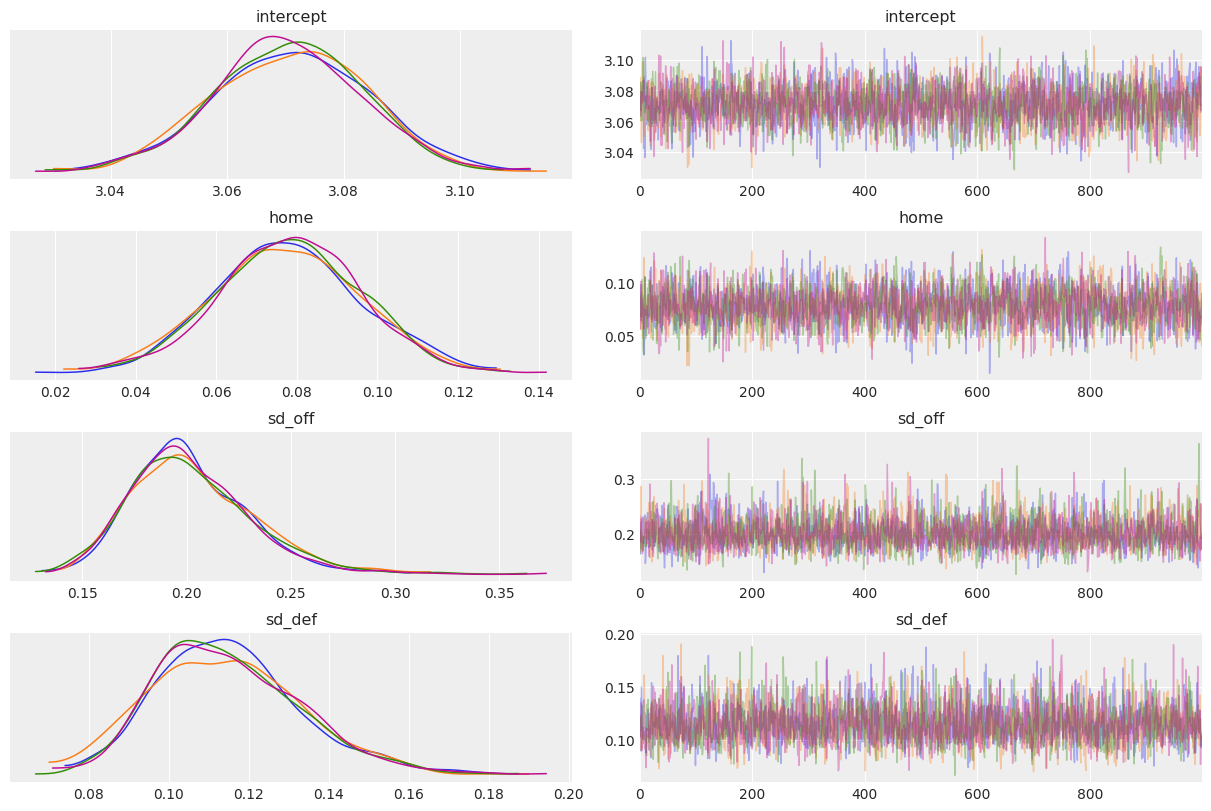

In [25]:
az.plot_trace(trace, var_names=["intercept", "home", "sd_off", "sd_def"], compact=False)       #checking for divergences

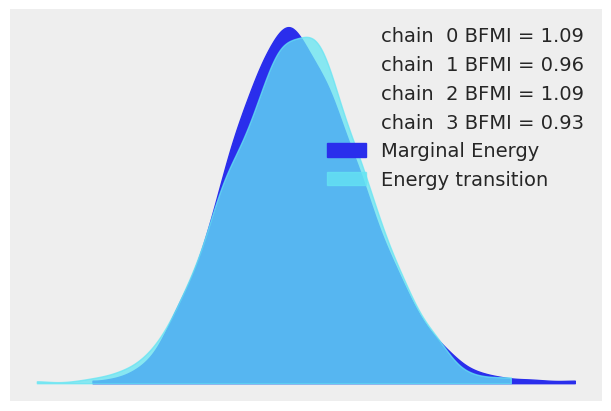

In [26]:
az.plot_energy(trace, figsize=(6, 4))     #checking for divergences

In [27]:
trace_hdi = az.hdi(trace)
print('offenses : ', trace_hdi["offenses"])       
print('\nDefenses : ', trace_hdi["defenses"])       #looking at the HDIs of the offense/defense variables, for defenses negative is better 

offenses :  <xarray.DataArray 'offenses' (team: 32, hdi: 2)>
array([[ 0.06843831,  0.2407778 ],
       [-0.27280162, -0.07324138],
       [-0.09382873,  0.09458926],
       [ 0.11148089,  0.27826787],
       [-0.30984786, -0.10444285],
       [-0.30322613, -0.09816711],
       [ 0.05601465,  0.2290319 ],
       [-0.1926703 , -0.00447691],
       [ 0.22534778,  0.39125733],
       [-0.27466911, -0.0774196 ],
       [-0.23573599, -0.03756006],
       [ 0.05825195,  0.23367769],
       [-0.39675499, -0.18260751],
       [ 0.05960525,  0.23190872],
       [-0.47782121, -0.2524321 ],
       [ 0.13406617,  0.30481775],
       [ 0.09421534,  0.26893681],
       [ 0.12753563,  0.30035734],
       [-0.10689483,  0.0811385 ],
       [-0.21286604, -0.01860586],
       [ 0.00592641,  0.18378176],
       [ 0.06897822,  0.24674859],
       [-0.14041645,  0.04603682],
       [-0.48642318, -0.25236665],
       [-0.26251867, -0.05714323],
       [ 0.02965864,  0.20874523],
       [-0.2020862 , -0.00464

In [29]:
trace.posterior["offenses"].median(("chain", "draw"))

"""[ 0.15418165, -0.17690976,  0.00299088,  0.19950478, -0.21270189,
       -0.20199721,  0.14602154, -0.09811184,  0.30691512, -0.17563165,
       -0.14132161,  0.14921754, -0.28485741,  0.14331059, -0.36478049,
        0.21764967,  0.17485199,  0.21363902, -0.01683665, -0.11537313,
        0.0930838 ,  0.1575481 , -0.04684726, -0.3588477 , -0.16040691,
        0.11962159, -0.10013887,  0.03224312,  0.09126945,  0.27765952,
        0.08692406, -0.10660709]"""

'[ 0.15418165, -0.17690976,  0.00299088,  0.19950478, -0.21270189,\n       -0.20199721,  0.14602154, -0.09811184,  0.30691512, -0.17563165,\n       -0.14132161,  0.14921754, -0.28485741,  0.14331059, -0.36478049,\n        0.21764967,  0.17485199,  0.21363902, -0.01683665, -0.11537313,\n        0.0930838 ,  0.1575481 , -0.04684726, -0.3588477 , -0.16040691,\n        0.11962159, -0.10013887,  0.03224312,  0.09126945,  0.27765952,\n        0.08692406, -0.10660709]'

## Results

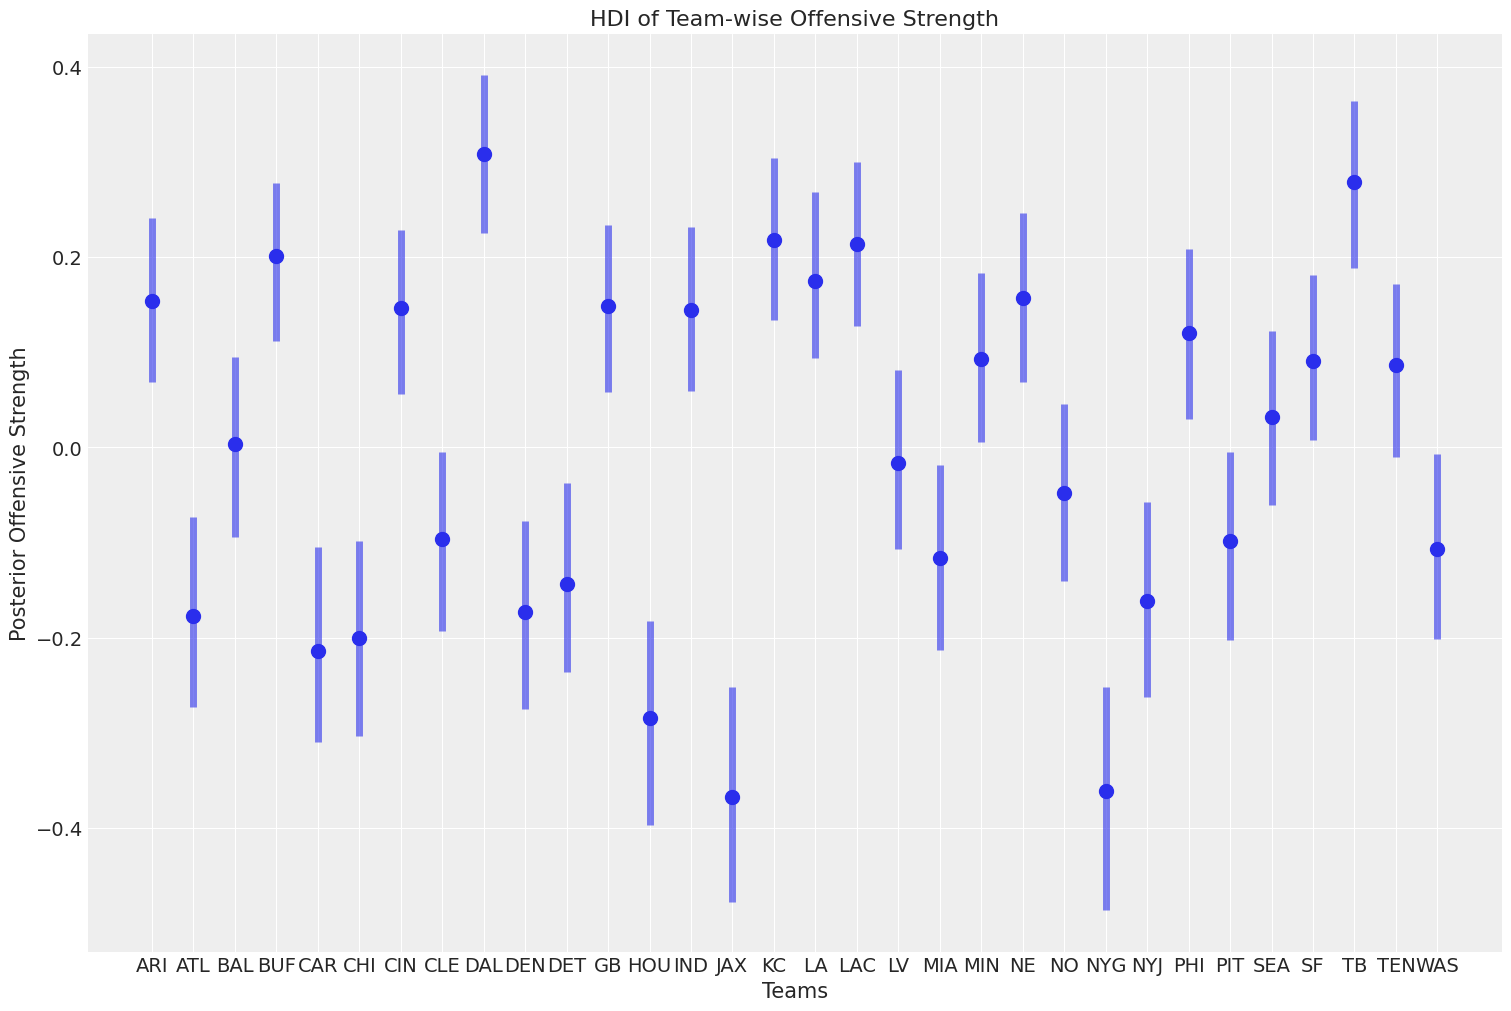

In [31]:
_, ax = plt.subplots(figsize=(15, 10))

ax.scatter(teams, trace.posterior["offenses"].median(dim=("chain", "draw")), color="C0", alpha=1, s=100)
ax.vlines(
    teams,
    trace_hdi["offenses"].sel({"hdi": "lower"}),
    trace_hdi["offenses"].sel({"hdi": "higher"}),
    alpha=0.6,
    lw=5,
    color="C0",
)
ax.set_xlabel("Teams")
ax.set_ylabel("Posterior Offensive Strength")
ax.set_title("HDI of Team-wise Offensive Strength");      #plotting the strength of each team's offense, with the HDI interval (basically a confidence interval)

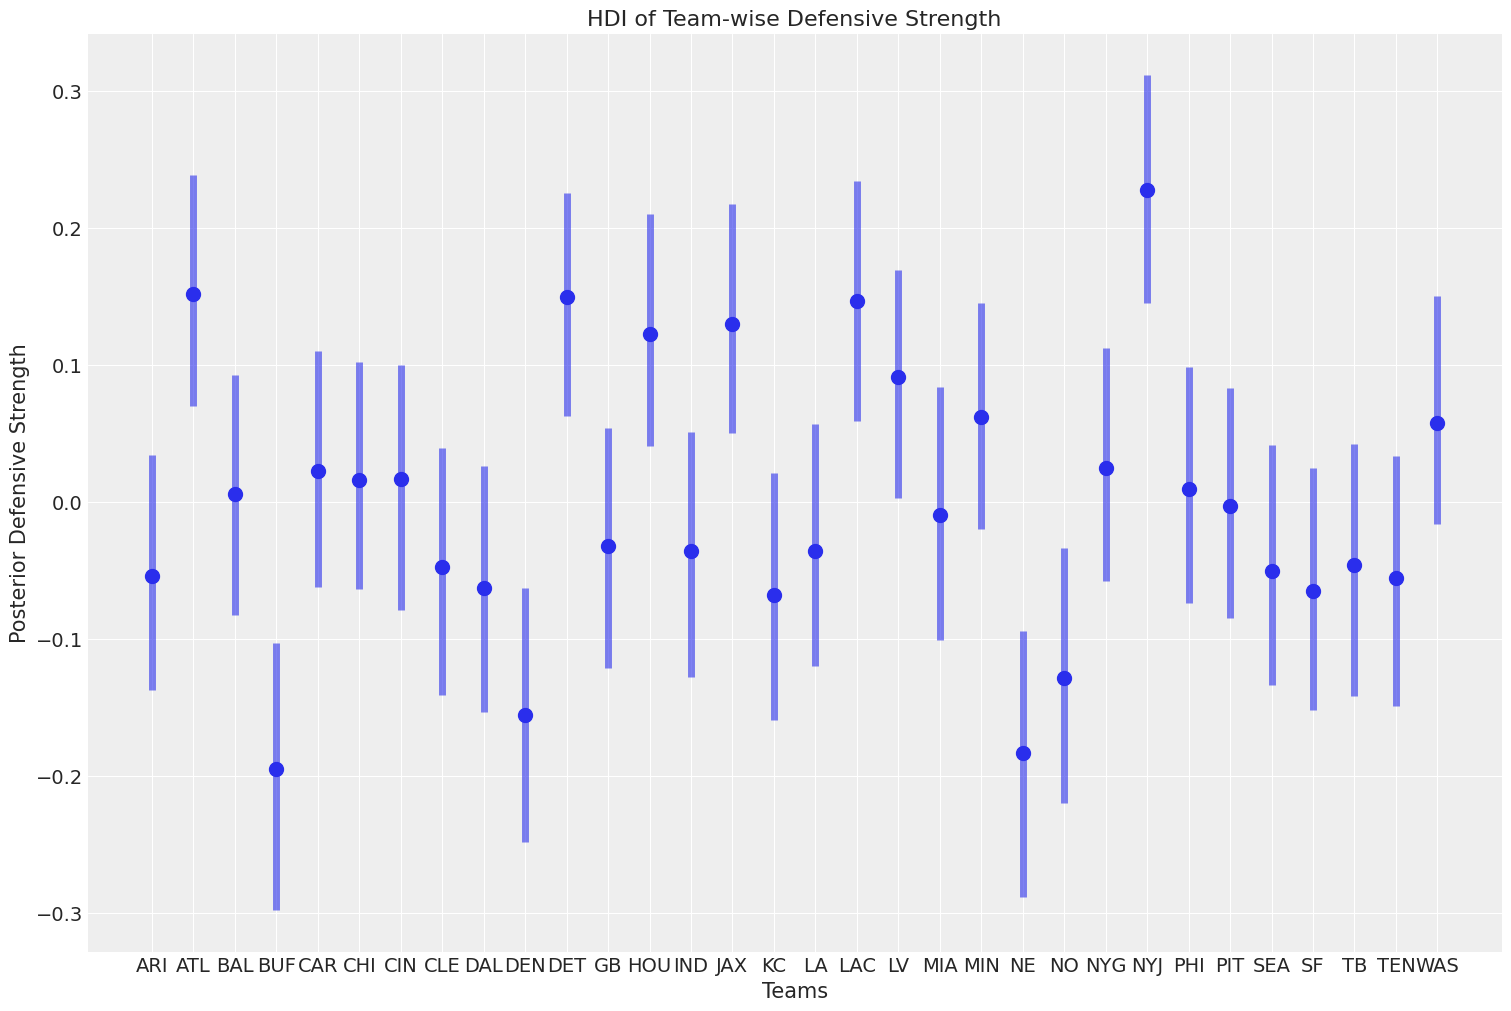

In [33]:
_, ax = plt.subplots(figsize=(15, 10))

ax.scatter(teams, trace.posterior["defenses"].median(dim=("chain", "draw")), color="C0", alpha=1, s=100)
ax.vlines(
    teams,
    trace_hdi["defenses"].sel({"hdi": "lower"}),
    trace_hdi["defenses"].sel({"hdi": "higher"}),
    alpha=0.6,
    lw=5,
    color="C0",
)
ax.set_xlabel("Teams")
ax.set_ylabel("Posterior Defensive Strength")
ax.set_title("HDI of Team-wise Defensive Strength");         #plotting the strength of each team's defense, with the HDI interval (basically a confidence interval)

In [ ]:
az.plot_posterior(trace, var_names=["defs"]);

In [ ]:
az.plot_posterior(trace, var_names=["atts"]);

## Simulations

In [38]:
pairings = {'home_team' : [], 'away_team' : []}
for home_team in df_all['home_team'].unique():
  for away_team in df_all['home_team'].unique():
    if home_team != away_team: 
      pairings['home_team'].append(team_idx_map[home_team])
      pairings['away_team'].append(team_idx_map[away_team])

pairs_df = pd.DataFrame.from_dict(pairings)         #making pais_df, a dataframe that consists of all the possible matchups between each NFL team and doubles it, one at home and one away
pairs_df

,home_team,away_team
0,29,1
1,29,3
2,29,4
3,29,6
4,29,10
...,...,...
987,8,2
988,8,11
989,8,9
990,8,20


In [ ]:
team_idx_map, i = {}, 0
for team in teams: 
  team_idx_map[team] = i
  i += 1
team_idx_map        #making a dictionary that maps team name to id number

In [ ]:
idx_team_map, i = {}, 0
for team in teams: 
  idx_team_map[i] = team
  i += 1
idx_team_map        #making a dictionary that maps id number to team name

In [41]:
with model: 
  pm.set_data({"home_team" : pairs_df["home_team"], "away_team" : pairs_df["away_team"]})
  posterior_predictive = pm.sample_posterior_predictive(trace, var_names=["home_points", "away_points"])
  print(posterior_predictive)           #doing posterior predictive check

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data


In [78]:
wins = {}
for chain in [0, 1, 2, 3]: 
  for draw in range(1000):
    for game in range(992):
      home_points = int(posterior_predictive['posterior_predictive']['home_points'][chain][draw][game])   #all games for that chain and draw
      away_points = int(posterior_predictive['posterior_predictive']['away_points'][chain][draw][game])
      home_team_idx = int(posterior_predictive['constant_data']['home_team'][game])
      away_team_idx = int(posterior_predictive['constant_data']['away_team'][game])
      home_team = idx_team_map[home_team_idx]
      away_team = idx_team_map[away_team_idx]
      if home_points > away_points: 
        try:
          wins[home_team] += 1
        except:
          wins[home_team] = 1
      elif home_points < away_points: 
        try:
          wins[away_team] += 1
        except: 
          wins[away_team] = 1
      else: 
        try: 
          wins[home_team] += .5
        except: 
          wins[home_team] = .5
        try:
          wins[away_team] += .5
        except:
          wins[away_team] = .5                #seeing who wins every game and recording it

  print('Done with chain : ', str(chain))

In [79]:
wins

{'TB': 221421.0,
 'BUF': 239925.5,
 'NE': 217299.5,
 'DAL': 229678.0,
 'ATL': 37831.5,
 'CIN': 147076.0,
 'IND': 152825.5,
 'TEN': 157848.0,
 'WAS': 74021.0,
 'KC': 200156.0,
 'NO': 153768.0,
 'LA': 190188.5,
 'LV': 91127.0,
 'CHI': 50755.5,
 'CLE': 114734.0,
 'MIA': 80263.0,
 'PHI': 146036.5,
 'PIT': 77841.5,
 'ARI': 197908.5,
 'LAC': 145430.0,
 'SEA': 139902.0,
 'BAL': 103932.0,
 'GB': 187863.0,
 'DEN': 118187.0,
 'MIN': 141425.5,
 'SF': 185275.5,
 'CAR': 42822.5,
 'DET': 46572.0,
 'HOU': 17950.0,
 'NYJ': 28328.5,
 'NYG': 10472.0,
 'JAX': 19135.5}

In [81]:
ranking = sorted(wins.keys(), key=lambda x : wins[x], reverse=True)
ranking               #ranking the teams as they stood at the end of the 2021 season

['BUF',
 'DAL',
 'TB',
 'NE',
 'KC',
 'ARI',
 'LA',
 'GB',
 'SF',
 'TEN',
 'NO',
 'IND',
 'CIN',
 'PHI',
 'LAC',
 'MIN',
 'SEA',
 'DEN',
 'CLE',
 'BAL',
 'LV',
 'MIA',
 'PIT',
 'WAS',
 'CHI',
 'DET',
 'CAR',
 'ATL',
 'NYJ',
 'JAX',
 'HOU',
 'NYG']